In [40]:
import pandas as pd, sqlite3

In [41]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

In [42]:
# Чтение данных:
commits = pd.read_sql("""
    SELECT uid, timestamp
    FROM checker
    WHERE uid LIKE 'user_%'
""", conn)

In [43]:
# Временные данные
commits["timestamp"] = pd.to_datetime(commits["timestamp"])
commits["hour"] = commits["timestamp"].dt.hour
commits["weekday"] = commits["timestamp"].dt.weekday
commits["is_weekend"] = commits["weekday"] >= 5 

In [44]:
commits

,uid,timestamp,hour,weekday,is_weekend
0,user_4,2020-04-17 05:19:02.744528,5,4,False
1,user_4,2020-04-17 05:22:35.249331,5,4,False
2,user_4,2020-04-17 05:22:45.549397,5,4,False
3,user_4,2020-04-17 05:34:14.691200,5,4,False
4,user_4,2020-04-17 05:34:24.422370,5,4,False
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,20,3,False
3203,user_1,2020-05-21 20:22:41.785725,20,3,False
3204,user_1,2020-05-21 20:22:41.877806,20,3,False
3205,user_1,2020-05-21 20:37:00.129678,20,3,False


In [45]:
# Разделение
working = commits[commits["is_weekend"] == False]
weekend = commits[commits["is_weekend"] == True]

In [46]:
# Группировка по часу и подсчёт среднего числа коммитов (по дням)
working_avg = working.groupby("hour").size() / working["timestamp"].dt.date.nunique()
weekend_avg = weekend.groupby("hour").size() / weekend["timestamp"].dt.date.nunique()

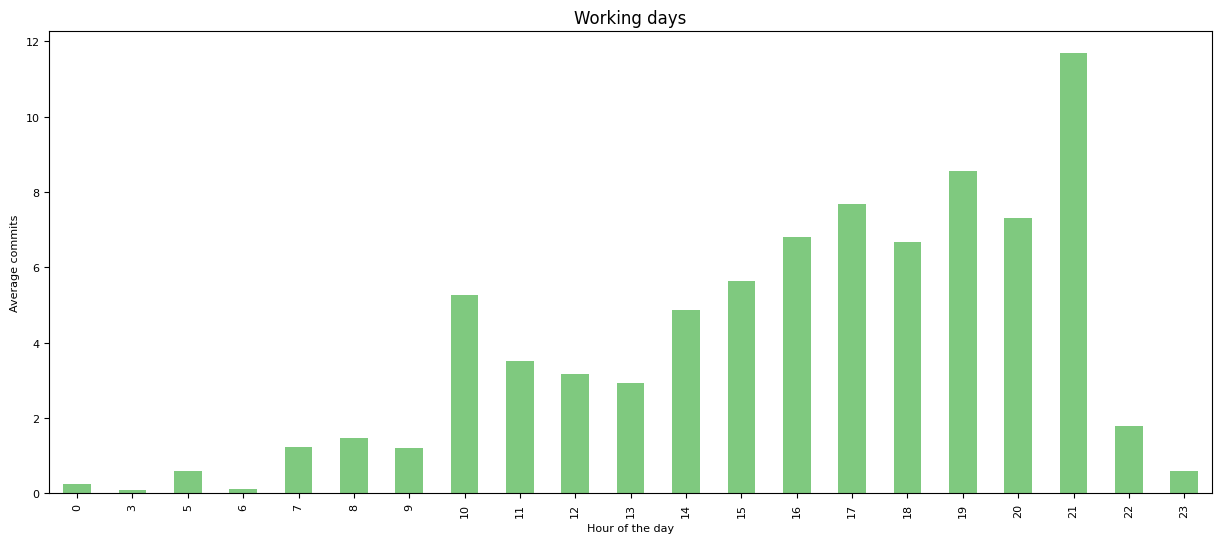

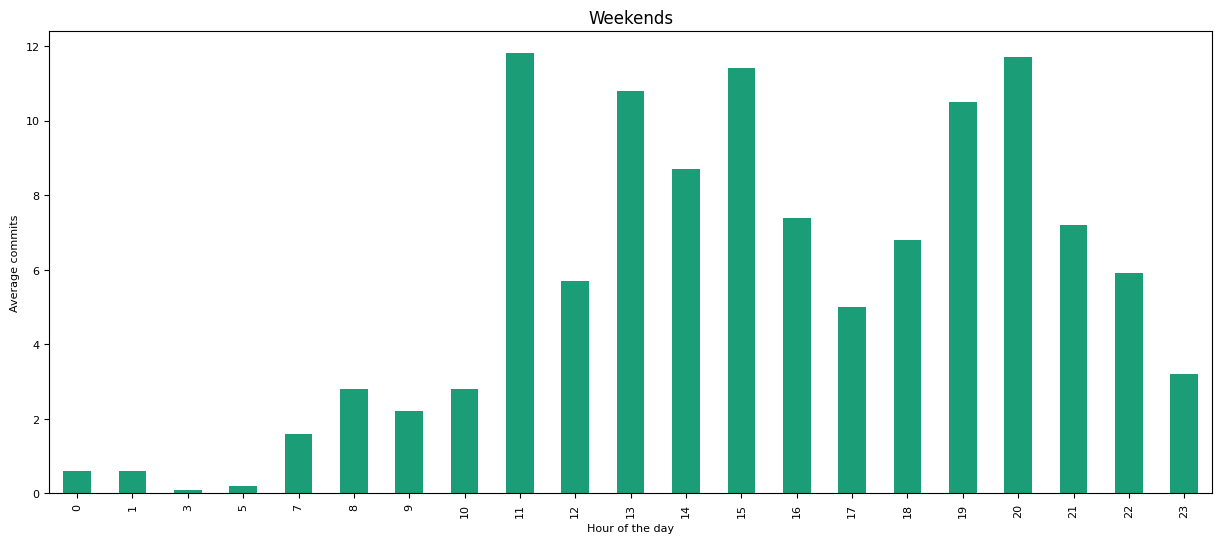

In [47]:
# График рабочих дней
ax1 = working_avg.plot(
    kind="bar",
    figsize=(15, 6),
    fontsize=8,
    colormap="Accent",
    title="Working days"
)
ax1.set_xlabel("Hour of the day", fontsize=8)
ax1.set_ylabel("Average commits", fontsize=8)
plt.show()

# График выходных
ax2 = weekend_avg.plot(
    kind="bar",
    figsize=(15, 6),
    fontsize=8,
    colormap="Dark2",
    title="Weekends"
)
ax2.set_xlabel("Hour of the day", fontsize=8)
ax2.set_ylabel("Average commits", fontsize=8)
plt.show()

In [48]:
# Найти час с наибольшим количеством коммитов
max_working_hour = working_avg.idxmax()
max_weekend_hour = weekend_avg.idxmax()
print("The hour with the most commits on working days is", max_working_hour)
print("The hour with the most commits on weekends is", max_weekend_hour)

The hour with the most commits on working days is 21
The hour with the most commits on weekends is 11


In [49]:
conn.close()

## Вопрос:
Отличается ли динамика в рабочие дни и выходные?

Час с наибольшим количеством коммитов в рабочие дни — **21**, а в выходные — **11**.
